In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Régression linéaire avec numpy
### Jeu d'entrainement - Features ou variables explicatives
X = 1 vecteur colonne (100 lignes, 1 colonne)<br>
100 observations contenant chacune une feature (variable explicative).

.rand -> valeurs aléatoires comprises entre 0 et 1

( multiplie par 2 pour étaler un peu sur l'axe des abscisses )

In [48]:
X = 2 * np.random.rand(100, 1)

### Jeu d'entrainement - Target - étiquette - variable à expliquer
y = 1 vecteur colonne (100 lignes, 1 colonne), représentant la variable à expliquer ou étiquette de chaque observation.

équation linéaire : y = 4 + 3 * X + bruit<br>
|||
|:-:|:--:|
|4 | intercept, biais, terme constant, $𝜃_0$, valeur de 𝑦 quand la variable explicative 𝑋 est égale à 0 |
|3 | coefficient associé à la variable explicative 𝑋|
|X | vecteur des features (de taille 100 lignes, 1 colonne)|
|bruit | perturbation aléatoire ajoutée pour rendre les données plus réalistes|

.randn -> valeurs aléatoires suivant une distribution normale standard (moyenne 0 et écart-type 1)

In [49]:
y = 4 + 3 * X + np.random.randn(100, 1)

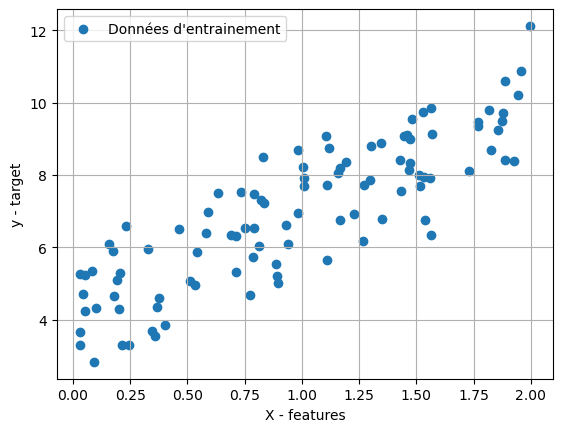

In [50]:
plt.scatter (X, y, label="Données d'entrainement")
plt.xlabel("X")
plt.ylabel("y")
plt.xlabel("X - features")
plt.ylabel("y - target")
plt.grid(True)
plt.legend()

### Jeu d'entrainement - Ajout du biais

Afin que le modèle puisse estimer le biais correctement, il faut ajouter $X_0$ = 1<br>
ainsi le biais $\theta_0$ est multiplié par 1 à chaque observations
|||
|:--:|:---| 
|np.ones((100, 1))|  crée une colonne de 1, (100 lignes, 1 colonne) correspond à la feature fictive 𝑥0 = 1 pour chaque observation|
|np.c_| concatène la colonne de 1 avec la matrice X|

ça crée une nouvelle matrice 𝑋𝑏 avec une première colonne de 1 suivie des valeurs de 𝑋

In [51]:
X_b = np.c_[np.ones((100, 1)), X] 

### Equation normale
Formule mathématique qui donne la valeur minimal  de $\theta$ ( le meilleur vecteur de paramètres)
$$ \hat{\theta} = (X^T X)^{-1} X^T y $$

|||
|:--:|:---|
|np.linalg.inv()   |    calcule l'inverse de la matrice obtenue à l'étape précédente|
|X_b.T             |   la transposée de la matrice X_b|
|X_b               |   est de taille (100, 2)|
|X_b.𝑇             |  est de taille (2, 100)|

Dans la 2ème cellule, quand on à défini le vecteur target y, on avait donné les paramètres 4 et 3 et le bruit<br>
Sans ce bruit, l'équation normale aurais permsi de retrouver ces paramètres.

In [52]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.15258912],
       [2.89939908]])

### Jeu de test - Features ou variable explicative
Tableau 𝑋_test avec deux nouvelles observations<br>
𝑋_test est de taille (2 lignes, 1 colonne)<br>
La première observation a une valeur de 0<br>
La deuxième observation a une valeur de 2.

In [53]:
X_test = np.array([[0], [2]])

### Jeu de test - ajout du biais
une colonne de 1 (2 lignes, 1 colonne)<br>
X_test_b est de taille (2,2)

In [54]:
X_test_b = np.c_[np.ones((2, 1)), X_test]

Prédiction avec l'équation normale. Vecteur des meilleurs paramètres du modèle linéaire :

$y_{predict} = X_{test_b} . θ_{best}$<br>
Chaque ligne est multipliée par 𝜃best

θ 
best
​
  est le vecteur des meilleurs paramètres (les coefficients optimaux) du modèle linéaire obtenus via l'équation normale.

Chaque ligne de 
𝑋
test_b
X 
test_b
​
  (c'est-à-dire une observation) est multipliée par le vecteur des paramètres 
𝜃
best
θ 
best
​
  pour produire la prédiction 
𝑦
predict
y 
predict
​
 ."

In [55]:
y_predict = X_test_b @ theta_best
y_predict

array([[4.15258912],
       [9.95138727]])

(0.0, 2.0, 0.0, 15.0)

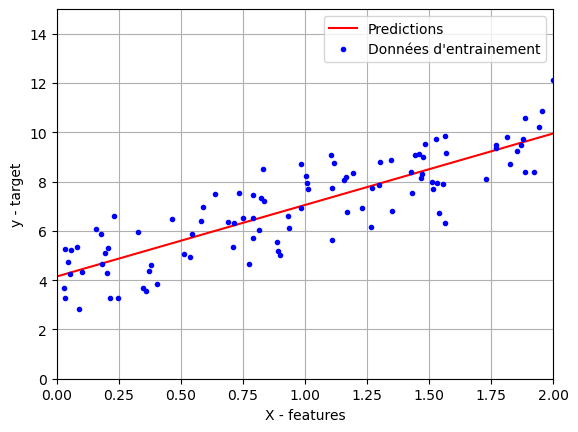

In [56]:
plt.plot(X_test, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Données d'entrainement")
plt.xlabel("X - features")
plt.ylabel("y - target")
plt.grid(True)
plt.legend()
# fixe les limites des axes x et y
plt.axis([0, 2, 0, 15])